In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

ueq_items = pd.read_json('items.json', encoding='UTF-8')
language = "German"

In [15]:
# Read the Excel file
df = pd.read_csv('test_data.csv')

# Apply the first formula
df = df.applymap(lambda x: x-4 if x > 0 else "")

# Define a function for calculating the mean if count of numbers > 0
def mean_if_count_greater_than_zero(columns):
    values = columns.dropna().astype(float)
    return values.mean() if len(values) > 0 else ""

# Create the new columns
df[ueq_items[language]['Pragmatic Quality']] = df.iloc[:, 0:4].apply(mean_if_count_greater_than_zero, axis=1)
df[ueq_items[language]['Hedonic Quality']] = df.iloc[:, 4:8].apply(mean_if_count_greater_than_zero, axis=1)
df['Overall'] = df.iloc[:, 0:8].apply(mean_if_count_greater_than_zero, axis=1)

df

,1,2,3,4,5,6,7,8,Pragmatische Qualität,Hedonische Qualität,Overall
0,-3,2,0,1,-1,0,-1,1,0.00,-0.25,-0.125
1,1,1,0,1,-2,-1,0,1,0.75,-0.50,0.125
2,2,3,-2,1,1,2,1,0,1.00,1.00,1.000
3,1,2,2,0,0,2,2,0,1.25,1.00,1.125
4,0,0,0,1,1,1,0,1,0.25,0.75,0.500
5,2,0,0,1,2,2,1,1,0.75,1.50,1.125
6,1,2,2,2,-1,0,0,-1,1.75,-0.50,0.625
7,3,2,0,1,1,-1,1,0,1.50,0.25,0.875
8,3,3,2,1,0,2,1,1,2.25,1.00,1.625
9,2,2,1,1,2,1,2,2,1.50,1.75,1.625


In [23]:
pragmatische_qualität = df[ueq_items[language]['Pragmatic Quality']].mean()
hedonische_qualität = df[ueq_items[language]['Hedonic Quality']].mean()
overall = df['Overall'].mean()
results_df = pd.DataFrame({
    ueq_items[language]['Pragmatic Quality']: [pragmatische_qualität],
    ueq_items[language]['Hedonic Quality']: [hedonische_qualität],
    'Overall': [overall]
})
results_df


,Pragmatische Qualität,Hedonische Qualität,Overall
0,0.903846,0.519231,0.711538


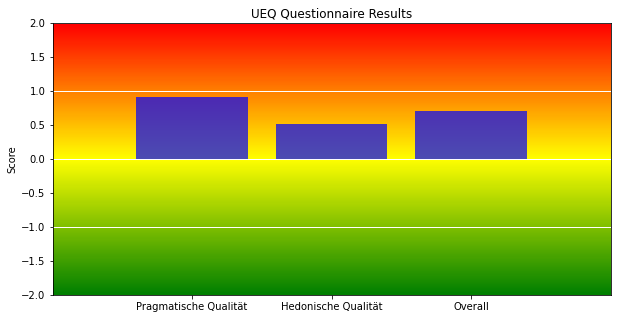

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Extract categories and values
categories = results_df.columns
values = results_df.loc[0].values

# Create a custom colormap for gradient
cmap = LinearSegmentedColormap.from_list('my_cmap', ['red', 'yellow', 'green'], N=256)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the gradient background
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.hstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[-1, len(categories), -2, 2])

# Plot the bar chart
bars = ax.bar(categories, values, color='blue', alpha=0.7)

# Add lines to represent scale
for i in np.linspace(-2, 2, 5):
    ax.axhline(i, color='white', lw=1)

# Set axis limits and labels
ax.set_ylim(-2, 2)
ax.set_ylabel('Score')
ax.set_title('UEQ Questionnaire Results')

# Show the plot
plt.show()


In [19]:
columns_to_exclude = [ueq_items[language]['Pragmatic Quality'], ueq_items[language]['Hedonic Quality'], 'Overall']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]
filtered_df = df[filtered_columns]
result_df = pd.DataFrame({
    'Item': filtered_df.columns,
    'Mean': filtered_df.mean(),
    'Variance': filtered_df.var(),
    'Std. Dev.': filtered_df.std(),
    'No.': filtered_df.count(),
    "Negative": [ueq_items[language][["L11","L13","L20","R21","L6","L7","R10","L15"][int(col)-1]] for col in filtered_df.columns],
    "Positive": [ueq_items[language][["R11","R13","R20","L21","R6","R7","L10","R15"][int(col)-1]] for col in filtered_df.columns],
}).reset_index(drop=True)
result_df

,Item,Mean,Variance,Std. Dev.,No.,Negative,Positive
0,1,0.769231,3.692308,1.921538,13,behindernd,unterstützend
1,2,1.538462,1.102564,1.050031,13,kompliziert,einfach
2,3,0.230769,2.192308,1.480644,13,ineffizient,effizient
3,4,1.076923,0.576923,0.759555,13,verwirrend,übersichtlich
4,5,0.076923,2.243590,1.497862,13,langweilig,spannend
5,6,0.692308,1.230769,1.109400,13,uninteressant,interessant
6,7,0.846154,1.141026,1.068188,13,konventionell,originell
7,8,0.461538,0.769231,0.877058,13,herkömmlich,neuartig
